In [157]:
import plots
import prepare_data
import voronoi_analysis
import numpy as np
import matplotlib.pyplot as plt

In [43]:
import importlib
importlib.reload(voronoi_analysis)
importlib.reload(plots)

<module 'plots' from 'c:\\Users\\Magda\\Documents\\GitHub\\solution_pipes_patterns\\plots.py'>

In [10]:
data_path="new_points.dat"
area_limit=14

In [11]:
data_path_random="new_points_random.dat"

In [44]:
df = prepare_data.read_data(data_path, preprocessed=True)
df_random= prepare_data.read_data(data_path_random, preprocessed=True)

voronoi_analyser = voronoi_analysis.VoronoiAnalyser(df)
voronoi_plotter = plots.Voronoi_Plotter(df)

voronoi_analyser_random = voronoi_analysis.VoronoiAnalyser(df_random)
voronoi_plotter_random = plots.Voronoi_Plotter(df_random)

BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized
BaseVoronoi initialized


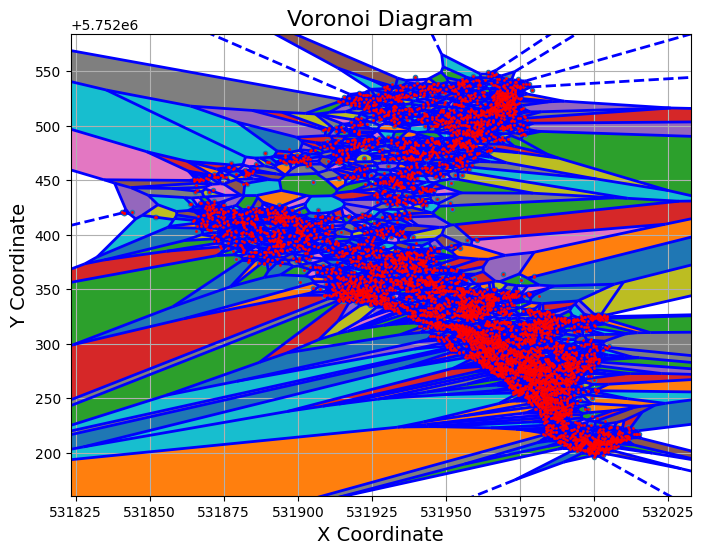

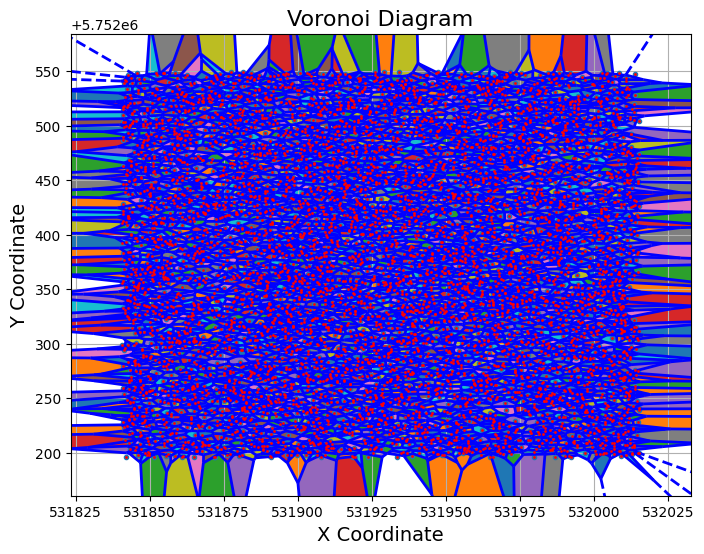

In [62]:
voronoi_plotter.all_voronoi_diagram()
voronoi_plotter_random.all_voronoi_diagram()

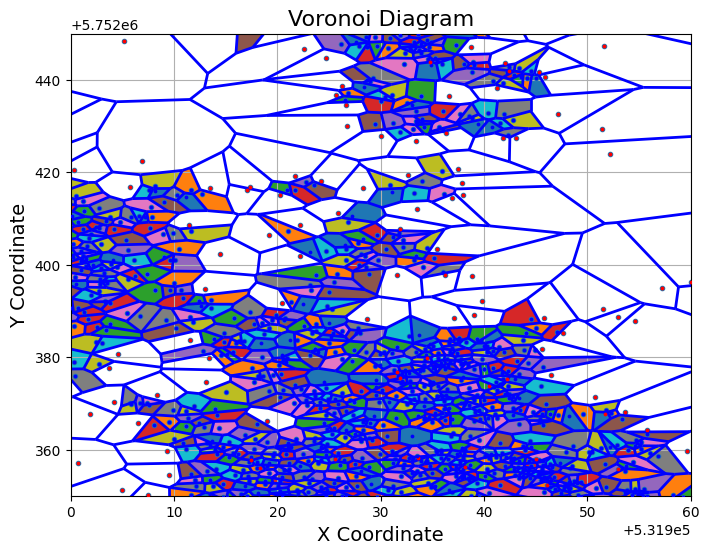

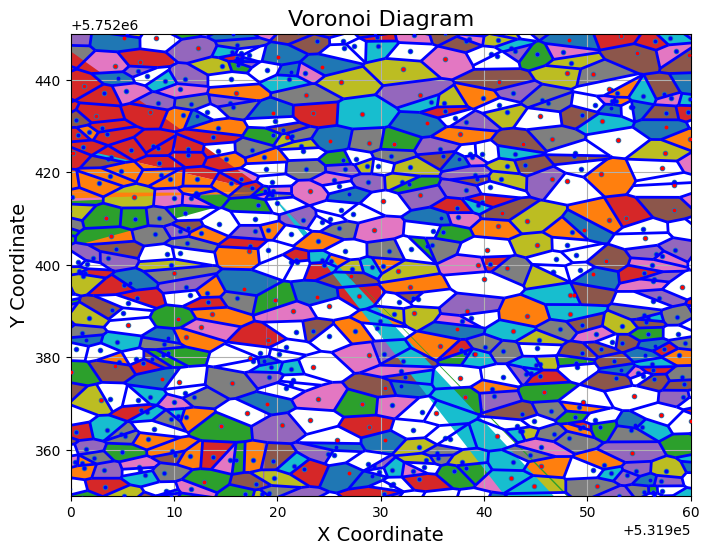

In [69]:
voronoi_plotter.all_voronoi_diagram_area_filtered(area_limit)

In [ ]:
voronoi_plotter_random.all_voronoi_diagram_area_filtered(area_limit)

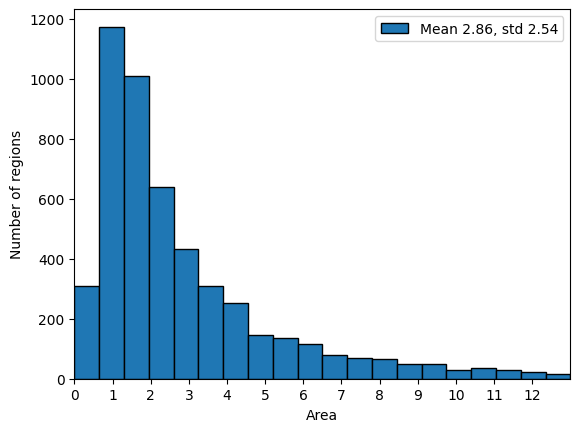

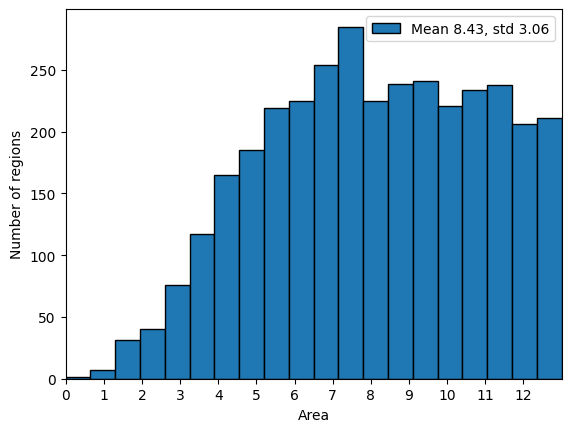

In [17]:
areas = df.loc[df["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas)

areas_random = df_random.loc[df_random["Point of Voronoi"] == 1, "Area"]
voronoi_plotter.areas_hist(areas_random)

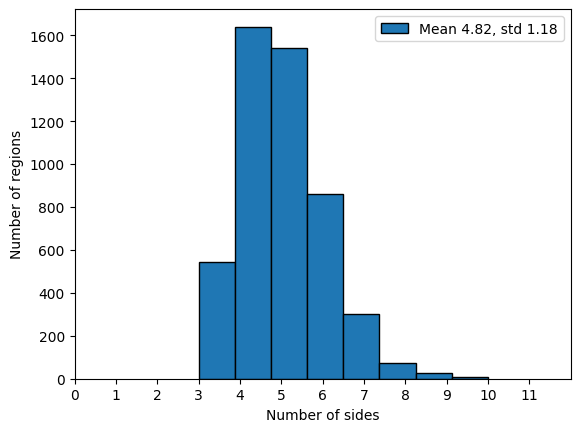

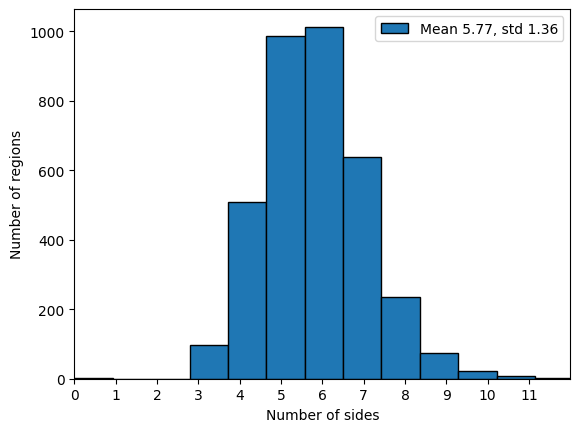

In [24]:
sides=voronoi_analyser.calculate_sides()
voronoi_plotter.sides_number_hist(sides)

sides_random=voronoi_analyser_random.calculate_sides()
voronoi_plotter.sides_number_hist(sides_random)

In [25]:
print(len(sides))

4992


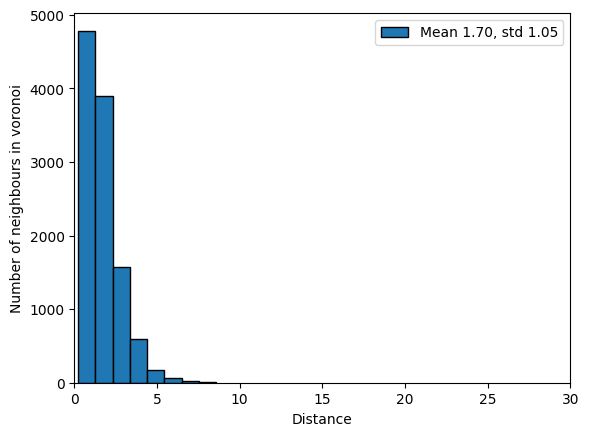

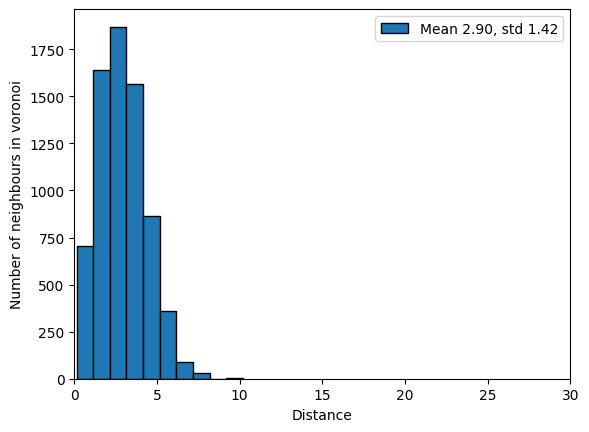

In [20]:
distances=voronoi_analyser.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances)

distances_random=voronoi_analyser_random.calculate_distance_between_neighbours()
voronoi_plotter.distance_between_neighbours_hist(distances_random)

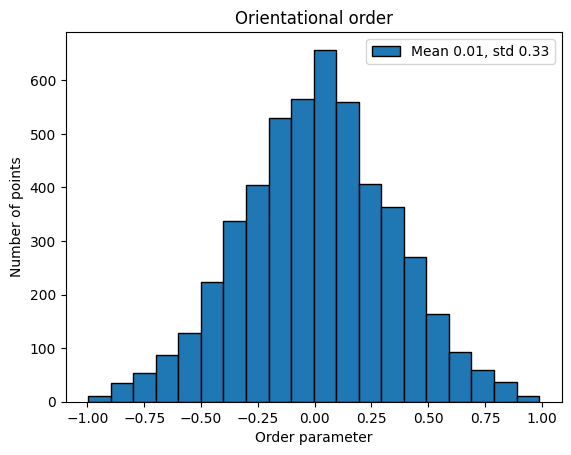

In [41]:
updated_df = voronoi_analyser.calculate_orientational_order(absolute = False)
order=updated_df.loc[df['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order)

In [123]:
updated_df


,Pipe radius,Center x coordinate,Center y coordinate,Point of Voronoi,Area,Region index,Hexatic order
0,1.823,531900.109,5752410.439,1.0,1.950,1555.0,0.402233
1,1.801,531899.516,5752408.933,1.0,1.993,913.0,-0.332046
2,1.977,531900.725,5752409.331,1.0,2.908,912.0,0.105063
3,0.966,531899.302,5752410.243,1.0,2.871,2490.0,0.127417
4,1.296,531898.673,5752408.901,1.0,4.043,597.0,0.835761
...,...,...,...,...,...,...,...
5536,1.644,531959.005,5752540.772,1.0,6.330,698.0,0.295808
5537,2.055,531961.248,5752540.864,1.0,5.542,358.0,-0.105850
5538,1.096,531966.830,5752547.684,0.0,685.006,144.0,0.000000
5539,1.507,531940.108,5752515.039,1.0,7.038,2806.0,0.031613


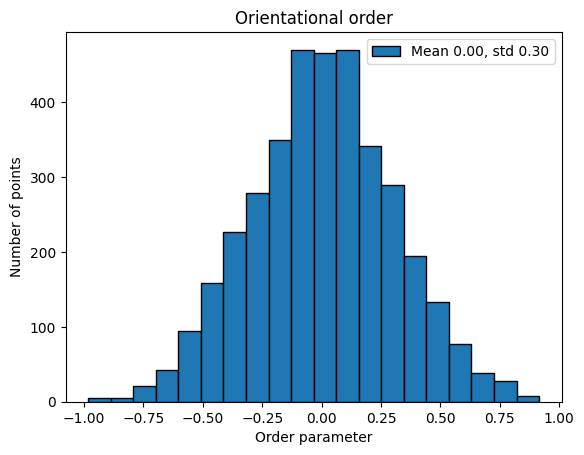

In [42]:
updated_df_random = voronoi_analyser_random.calculate_orientational_order(absolute = False)
order_random=updated_df_random.loc[df_random['Point of Voronoi']==1, 'Hexatic order']
voronoi_plotter.order_hist(order_random)

In [122]:
updated_df_random

,Pipe radius,Center x coordinate,Center y coordinate,Point of Voronoi,Area,Region index,Hexatic order
0,1.0,531857.776,5752339.850,0.0,18.206,3457.0,0.000000
1,1.0,531946.433,5752319.992,1.0,3.880,2445.0,-0.173934
2,1.0,531940.886,5752261.085,1.0,12.151,3554.0,0.032235
3,1.0,531987.717,5752413.148,1.0,11.762,4566.0,0.049365
4,1.0,531851.709,5752455.788,0.0,24.037,3284.0,0.000000
...,...,...,...,...,...,...,...
5351,1.0,531855.344,5752445.515,0.0,21.398,3267.0,0.000000
5352,1.0,531892.687,5752246.531,1.0,5.145,5270.0,-0.375883
5353,1.0,531916.525,5752443.759,1.0,1.843,5076.0,-0.234720
5354,1.0,531892.218,5752365.215,1.0,10.658,2572.0,0.073206


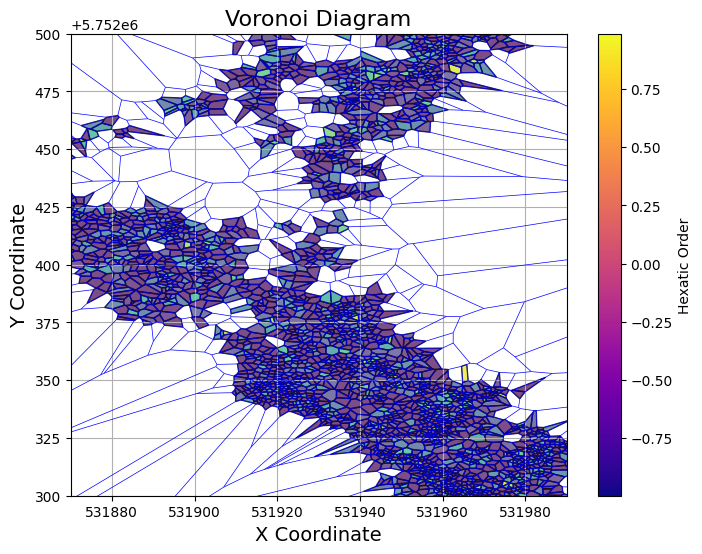

In [124]:
voronoi_plotter.hexatic_order(order)

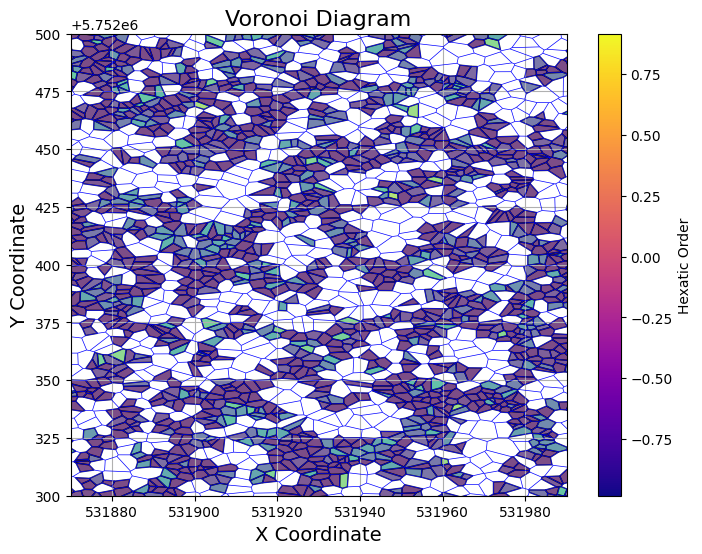

In [45]:
voronoi_plotter_random.hexatic_order(order_random)

In [174]:
r_values = np.linspace(1, 200, 150)  # Distances for K(r)
area = 200 * 200
k_results = voronoi_analyser.calculate_ripleys_k(r_values, area)

(11101,)
(4992, 4992)


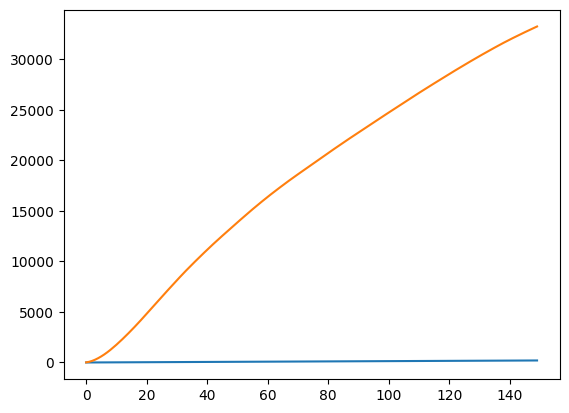

In [171]:
plt.plot(k_results)

In [163]:
k_results

,r,K(r)
0,1.0,2.909885
1,2.0,12.535384
2,3.0,27.354527
3,4.0,46.855975
4,5.0,70.574149
5,6.0,97.777763
6,7.0,128.547090
7,8.0,162.462304
8,9.0,199.088327
9,10.0,238.755080
